In [ ]:
import numpy as np, scipy as sp
from matplotlib import pyplot as plt

# Kitaev Chain


$$
\mathcal{H}_{\mathrm{KitaevChain}} = \frac{(t - \mu)}{2} \sum_{j} c_{j}^{\dagger} c_{j} + t \sum_{j} \left(c_{j}^{\dagger} c_{j+1} + c_{j+1}^{\dagger} c_{j}\right) - \Delta \sum_{j} \left(c_{j} c_{j+1} + c_{j+1}^{\dagger} c_{j}^{\dagger}\right)
$$

In [32]:
Lx=260;

t = -1.;                           # hopping interaction
d = 1.;                            # superconducting pair potential 
m = 2*np.sqrt(1)                   # chemical potential 

bc = 0.0;  # 0 <-> OBC, 1 <-> PBC, -1<->TBC other values give some smaller coupling 
L_bar=0;   #length of quantum dot barrier
μdot = 0;


mass  = (t-m)/2 * np.eye(Lx, Lx,0)  # mass / chemical potential---disorder goes here-- 

# tunneling matrix elements are modulated by the magnetic fields via pierel's phase
t_0 = t * (np.eye(Lx, Lx,1) + 0*bc*np.eye(Lx, Lx, Lx-1))   # open boundary conditions
H_0 = mass + (t_0 + t_0.transpose().conjugate())           # Hermitize

t_1 = t * (np.eye(Lx, Lx,1) + bc*np.eye(Lx, Lx, Lx-1))     # periodic boundary conditions
H_1 = mass + (t_1 + t_1.transpose().conjugate())           # Hermitize

Δ = (d *(np.eye(Lx, Lx,1) + 0*bc*np.eye(Lx, Lx, Lx-1)))    # SC pairing potential 
Δblock = Δ - Δ.transpose()

H_BdG0 = np.block([[H_0,Δblock],[Δblock.transpose().conjugate(),-H_0]]) # OBC BdG 
H_BdG1 = np.block([[H_1,Δblock],[Δblock.transpose().conjugate(),-H_1]]) # PBC BdG 
U1 = np.exp(H_BdG1);

# Tight Binding Basis

Let us explain our tight-binding code's basis. 

One sublety regard the definition of fermions. We are looking at a  <em> mean field, free fermion, single particle </em> picture.
This means that our tight-binding basis is comprised of $\{c^\dagger_i |\Omega\rangle , c_i |\Omega \rangle \}$. Here $|\Omega\rangle$ is the BCS vaccuum, $c^\dagger_i$ and $c_i$ denote the creation and annihilation operators for an  electron orbital at $\ \forall i \in (1,L)$. This is a single particle basis which means we <em> never </em> encounter a fermionic phase factor $-1$ due to multiple occupancies. 
All in all we have 
$$H_{BdG} = 
\begin{pmatrix}
H_0 & 
\Delta \\
\Delta^\dagger & -H_0
\end{pmatrix}$$

There are some more details regarding a choice for a conventional or nambu basis. For the moment there is no spin-degree of freedom so we ignore this. All the physics that holds here will also hold in that model, just that the couplings need to be correctly translated between the Kitaev- and Rashba-pictures.

### Overall workflow

* Solve for Majorana eigenstates and label them as $\gamma_L = c^\dagger_{NL} + c_{NL}, \gamma_L = i(c^\dagger_{NL} - c_{NL})$ where the subscript $NL$ refers to a topological <em>non-local (NL)</em> fermion mode. $i\gamma_L \gamma_R = \hat{n}_{NL}$
* Construct a well defined parity eigenstate of the topological mode. Note that this mode is self conjugate. That is, $c^\dagger_{NL}|\Omega> = \frac{\gamma_L + \gamma_R}{2}|\Omega> = c_{NL}|\Omega> = \frac{\gamma_L - \gamma_R}{2i}|\Omega> $ correspond to the same state. This is due to superconducting particle-hole symmetry. Thus the $c^\dagger_{NL}|\Omega>$ (or $c_{NL}|\Omega>$) can be considered the occupied state and $|\Omega\rangle$ will correspond to the un-occupied orbital. 



-0.5004480719232852 -2.137412066731327e-15 -7.688971737793298e-16 0.5004480719232853


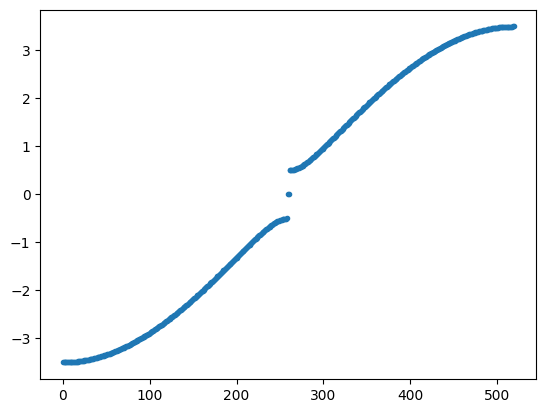

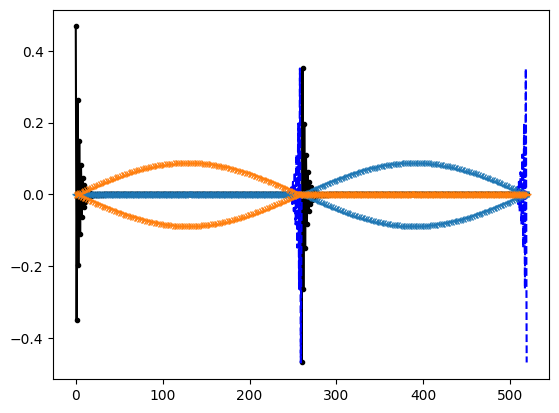

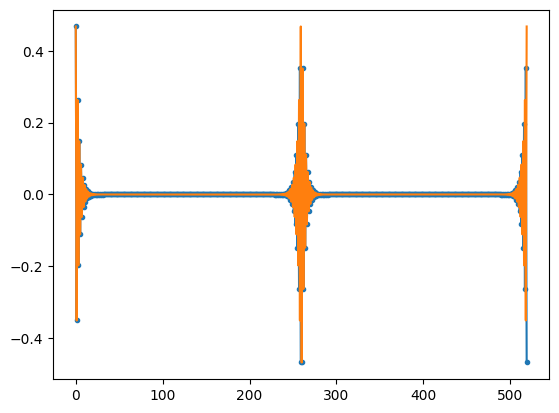

In [33]:
vals, vecs = np.linalg.eigh(H_BdG0)
plt.plot(vals,'.')
print(vals[Lx-2], vals[Lx-1], vals[Lx], vals[Lx+1])
plt.show()
ψ1 = vecs[:, Lx-1]
ψ2 = vecs[:, Lx-0]

plt.plot(ψ1,'.-k') #lowest eigenvalue
plt.plot(ψ2,'--b') # second
plt.plot(vecs[:, Lx-2],'3') # ++
plt.plot(vecs[:, Lx+1],'4') # ++
plt.show()

ϕ1 = ψ1+ψ2
ϕ2 = ψ1-ψ2
plt.plot(ϕ1,'.-') #lowest eigenvalue
plt.plot(ϕ2,'-') # second
plt.show()

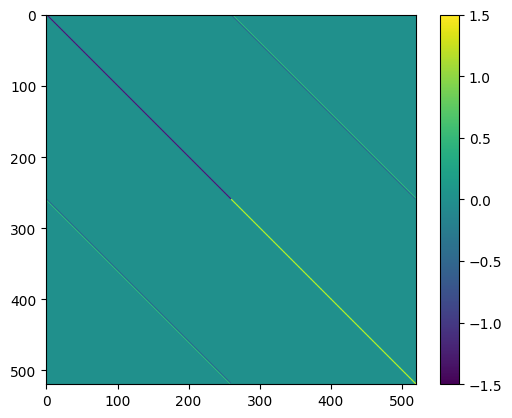

In [34]:
plt.imshow(H_BdG1)
plt.colorbar()
plt.show()

# Topological Phase transition

Vary the mass as $2\sqrt{j}$ with $j\in (0,1,2,3,4)$. 

Describe what happend to the spectrum. What does this mean in the context of a topological phase transition? 

What happened to the edge modes? 

# Extra Credit

Add disorder to the chain to test the robustness of the edge and bulk modes. 

(Hint: we used np.eye(Lx, Lx,1) to make a superdiagonal which is just a vector added to an all np.zeros((Lx,Lx)). You can do this manually to vary the interaction as a function of space, rather than keeping a spatially constant and homogeneous coupling. 

What do you find? 